### 本节为吴恩达Support Vector Machines章节的作业
1. ex6data1.mat、ex6data2.mat、ex6data3.mat均为所需的数据，是Matlab格式的，可以用scipy读取

#### 绘图函数

In [2]:
import matplotlib.pyplot as plt
import numpy as np 

def plot_predict(X, y, predictor, interval=0.1):
    x0_min, x0_max = X[:, 0].min(),X[:, 0].max()
    x1_min, x1_max = X[:, 1].min(),X[:, 1].max()
    xy, yx = np.meshgrid(np.arange(x0_min, x0_max, interval),
                    np.arange(x1_min, x1_max,interval))
    z = np.array([xy.ravel(), yx.ravel()]).T
    # 预测
    z_predict = []
    for _z in z:
        z_predict.append(predictor.predict(_z.reshape(1,-1)))
    z_predict = np.array(z_predict).reshape(xy.shape)
    # 绘制结果
    ax = plt.axes()
    ax.contourf(xy, yx, z_predict)
    # 绘制原始数据
    ax.scatter(X[y == 0,0], X[y == 0,1], marker='^', label='class1')
    ax.scatter(X[y == 1,0], X[y == 1,1], marker='o', label='class2')
    ax.legend()

#### 1. 第一部分作业
1. 这部分作业主要是通过一个异常点来让更好的学习C对SVM模型的影响！
2. Informally, the C parameter is a positive value that controls the penalty for misclassified training examples. **A large C parameter tells the SVM to try to classify all the examples correctly**.

In [3]:
# 加载数据
import scipy.io as sio
datas = sio.loadmat('ex6data1.mat')
X = datas['X']
y = datas['y'].ravel()

##### 训练模型（C=1.0）

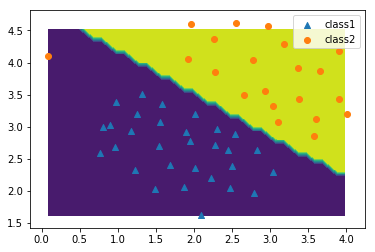

In [4]:
# 构造svm模型训练数据
from sklearn.svm import SVC
svm = SVC(C=1.0, kernel='linear', random_state=1)
svm.fit(X, y)
plot_predict(X, y, svm)

可以看到当C=1的时候，SVM错误将（0,4）处的那个点错误的归为第二类。

##### 训练模型（C=100.0）

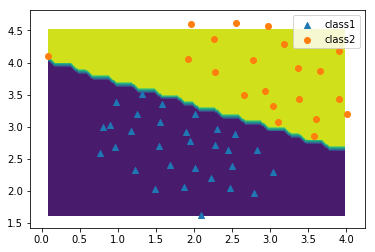

In [5]:
# 构造svm模型训练数据
from sklearn.svm import SVC
svm = SVC(C=100.0, kernel='linear', random_state=1)
svm.fit(X, y)
plot_predict(X, y, svm)

可以看到当C=100的时候，（0,4）处的那个点分类是正确的。

### 2. 第二部分作业
#### 高斯核函数

In [6]:
import numpy as np
# 实现高斯核函数
def gaussian_kernel(x, y, sigma):
    kernel = np.zeros((x.shape[0], y.shape[0]))
    for i,_x in enumerate(x):
        for j,_y in enumerate(y):
            kernel[i,j] = np.exp(- np.sum( np.power((_x - _y),2) ) / float( 2*(sigma**2) ) )
    return kernel

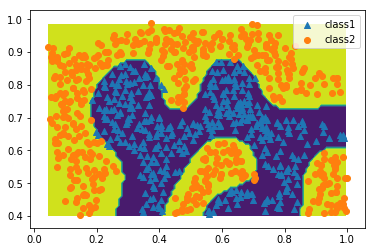

In [7]:
# 加载数据
import scipy.io as sio
from functools import partial

datas = sio.loadmat('ex6data2.mat')
X = datas['X']
y = datas['y'].ravel()
# 构造svm模型训练数据
from sklearn.svm import SVC
svm = SVC(C=1.0, kernel=partial(gaussian_kernel, sigma=0.1), random_state=1)
svm.fit(X, y)
plot_predict(X, y, svm, interval=0.01)

模型基本吻合

### 3.第三部分作业
#### 寻找合适的参数值

C = 0.01, simga = 0.01, error = 106
C = 0.01, simga = 0.03, error = 106
C = 0.01, simga = 0.1, error = 106
C = 0.01, simga = 0.3, error = 106
C = 0.01, simga = 1, error = 106
C = 0.01, simga = 3, error = 106
C = 0.01, simga = 10, error = 106
C = 0.01, simga = 30, error = 106
C = 0.03, simga = 0.01, error = 106
C = 0.03, simga = 0.03, error = 106
C = 0.03, simga = 0.1, error = 106
C = 0.03, simga = 0.3, error = 30
C = 0.03, simga = 1, error = 106
C = 0.03, simga = 3, error = 106
C = 0.03, simga = 10, error = 106
C = 0.03, simga = 30, error = 106
C = 0.1, simga = 0.01, error = 106
C = 0.1, simga = 0.03, error = 106
C = 0.1, simga = 0.1, error = 26
C = 0.1, simga = 0.3, error = 20
C = 0.1, simga = 1, error = 34
C = 0.1, simga = 3, error = 106
C = 0.1, simga = 10, error = 106
C = 0.1, simga = 30, error = 106
C = 0.3, simga = 0.01, error = 106
C = 0.3, simga = 0.03, error = 103
C = 0.3, simga = 0.1, error = 14
C = 0.3, simga = 0.3, error = 15
C = 0.3, simga = 1, error = 21
C = 0.3, simga = 

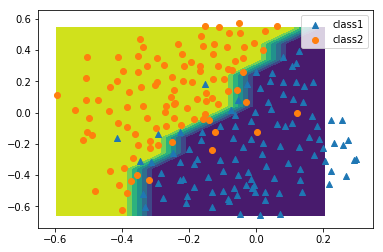

In [13]:
# 加载数据
import scipy.io as sio
from functools import partial
import sys
from sklearn.svm import SVC

datas = sio.loadmat('ex6data3.mat')
Xval = datas['Xval']
yval = datas['yval'].ravel()
X = datas['X']
y = datas['y'].ravel()
# C和sigma 后选集
debug = True
postselect=(0.01,0.03,0.1,0.3,1,3,10,30)
error = sys.maxsize
_C = None
_sigma = None
for C in postselect:
    for sigma in postselect:
        svm = SVC(C=C, kernel=partial(gaussian_kernel, sigma=sigma), random_state=1)
        svm.fit(Xval, yval)
        predictions = svm.predict(X)
        predictions = np.sum((predictions != y).astype(np.int32))
        if debug:
            print('C = {0}, simga = {1}, error = {2}'.format(C, sigma, predictions))
        if error >= predictions:
            error = predictions
            _C = C
            _sigma = sigma
if debug:
    print('the best solution: C = {0}, simga = {1}, error = {2}'.format(_C, _sigma, error))
svm = SVC(C=_C, kernel=partial(gaussian_kernel, sigma=_sigma), random_state=1)
svm.fit(X, y)
plot_predict(X, y, svm, 0.1)

吴恩达给了8组后选数据，C和simga组合起来则有$8x8=64$种情况，所以我们就构造64种模型，进行交叉训练，得到最合适的C和sigma

### 垃圾邮件过滤
### Spam Classification